Sergio Adrian Martínez Tena

Obtener la ecuación (o programa) que exprese la probabilidad de obtener el macroestado E a partir de N dados.

**Se importan las librerias necesarias**

In [1]:
from matplotlib import pyplot as plt
import numpy as np

**Funciones necesarias para calcular los microestados y macroestados**

In [2]:
def microStates(n: 'Numero de intentos', *, states: 'Estados posibles'):
    # Si el numero de intentos es 0 retorna una lista vacia
    if n == 0:
        return []
    # Si n es 1 el numero de posibles estados son los estados posibles
    elif n == 1:
        return states
    # Si n > 1 se realiza el calculo con recursion
    else:
        return [[j,*i] for j in states for i in microStates(n-1, states=states)]
    
def macroStates(n: 'Numero de intentos', *, states: 'Estados posibles'):
    # Se obtienen los microestados posibles a partir de los estados posibles
    states = microStates(n, states=states)
    # Diccionario para almacenar los macroestados
    macrostates = dict()
    # Por cada uno de los microestados posibles se ordenan segun el macroestado
    for state in states:
        # Se obtiene el macro estado
        macrostate = sum(int(value) for value in state)
        # Si el macroestado se encuentra en el diccionario agrega uno al conteo
        # Si el macroestado no se encuenta lo inicializa y agrega uno al conteo
        if macrostate in macrostates:
            macrostates[macrostate] += 1
        else:
            macrostates[macrostate] = 1
    return macrostates

In [19]:
states = microStates(n=2, states=['1','2','3','4','5','6'])
result = []
for state in states:
    if '5' in state:
        result.append(state)
result

[['1', '5'],
 ['2', '5'],
 ['3', '5'],
 ['4', '5'],
 ['5', '1'],
 ['5', '2'],
 ['5', '3'],
 ['5', '4'],
 ['5', '5'],
 ['5', '6'],
 ['6', '5']]

In [22]:
281*(1-0.0225)

274.6775

**Función para obtener la distribució total según el número de dados**

In [3]:
def distribution(n, *, states=['1','2','3','4','5','6']):
    # Areglo de eventos donde n es el mas pequeñoy 6n es el mas grande
    events = np.arange(n*int(states[0]),n*int(states[-1])+1)
    # Calcula la probailidad para cada uno de los eventos
    p = []
    for event in events:
        p.append(probEvent(event=event, n=n, states=states))
    # Grafica el histograma de probabilidades
    plt.figure(figsize=(14,8))
    plt.bar(x=events,height=p);
    plt.xticks(events);
    plt.xlabel('Events',fontdict={'size':16})
    plt.ylabel('Probability', fontdict={'size':16})
    plt.grid(True)
    return p

**Función para calculas la probabilidad de un evento**

In [4]:
def probEvent(event, *, n=1, states=['1','2','3','4','5','6']):
    # Obtiene los macroestados o espacio de eventos posibles
    macrostates = macroStates(n,states=states)
    # Se obtiene el tamaño del espacio muestral
    sampleSpace = sum(macrostates.values())
    # Se verifica si el evento pertenece a los eventos posibles
    if event in macrostates:
        return macrostates[event]/sampleSpace
    else:
        return 0

**Ejemplos:**

***Calcular la probabilidad de que:***

Al tirar 2 dados la suma sea 7

In [11]:
probEvent(event=,n=2)

0.16666666666666666

Al tirar 3 dados la suma sea 12

In [12]:
probEvent(event=12,n=3)

0.11574074074074074

Al tirar 5 dados la suma sea 20

In [13]:
probEvent(event=20,n=5)

0.08371913580246913

***Distribución de probabilidades con 2, 3, 4, 5 y 6 dados.***

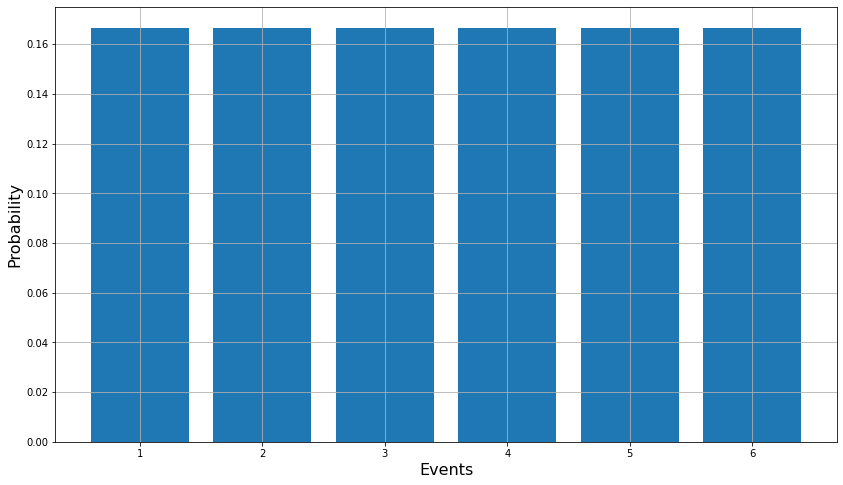

In [24]:
distribution(n=1);

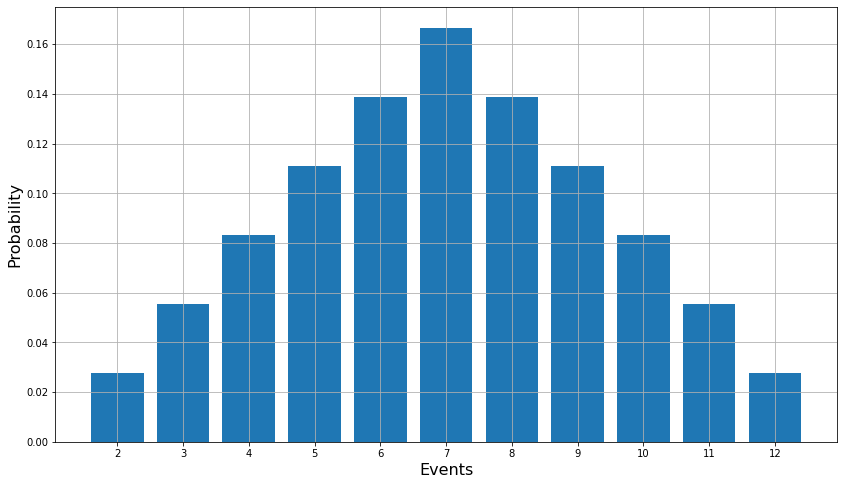

In [23]:
distribution(n=2);

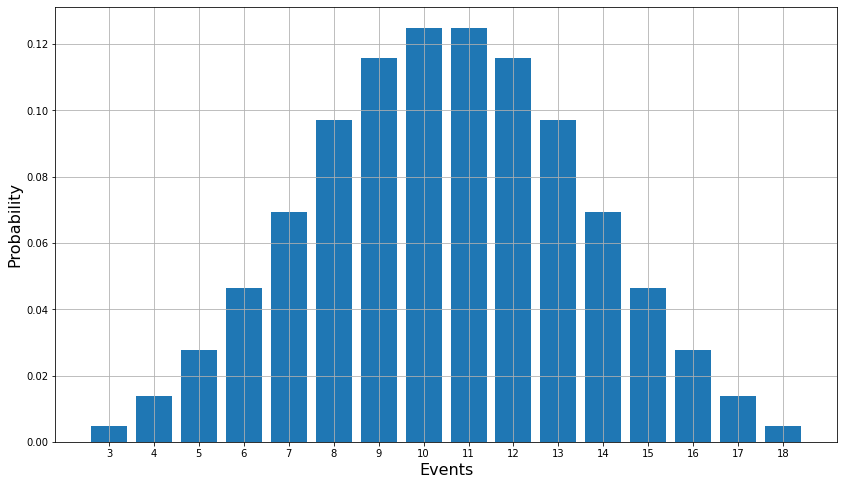

In [15]:
distribution(n=3);

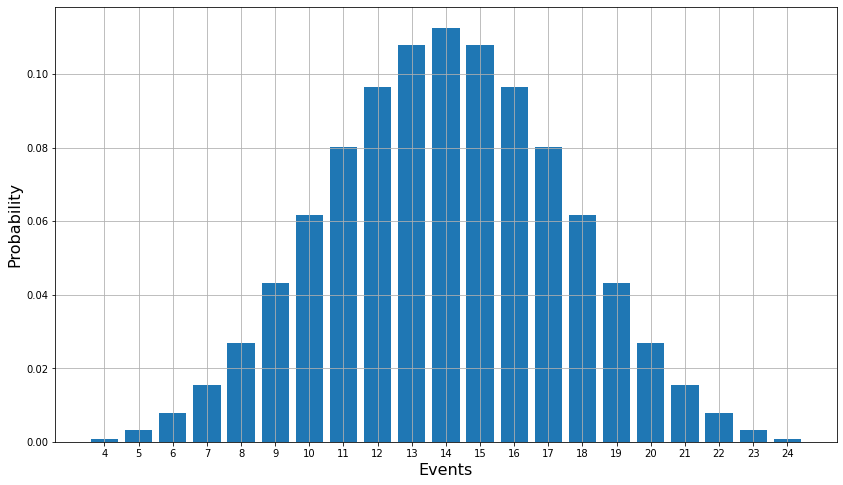

In [17]:
distribution(n=4);

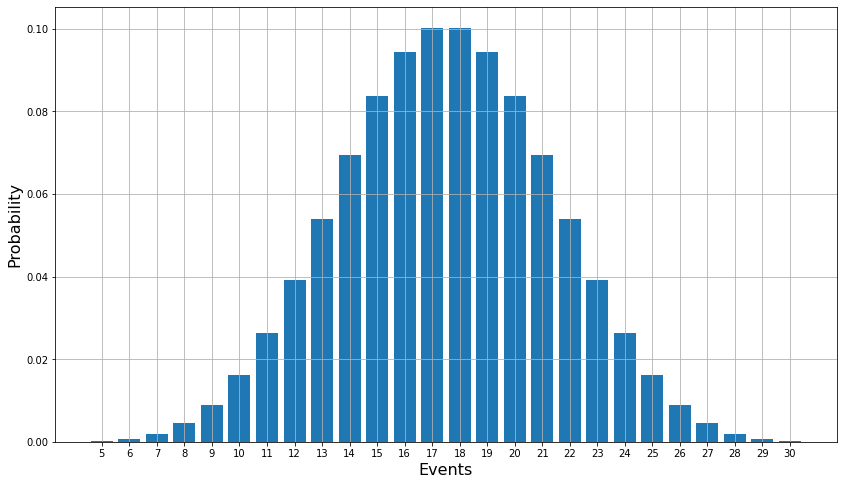

In [19]:
distribution(n=5);

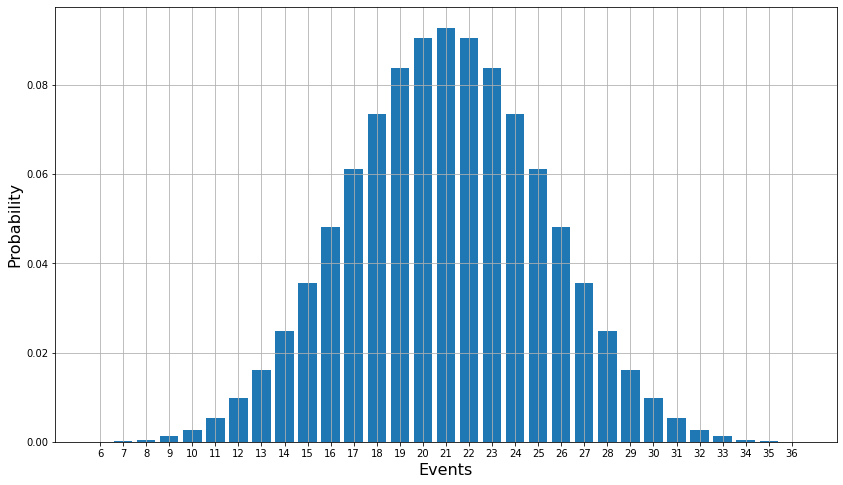

In [20]:
distribution(n=6);

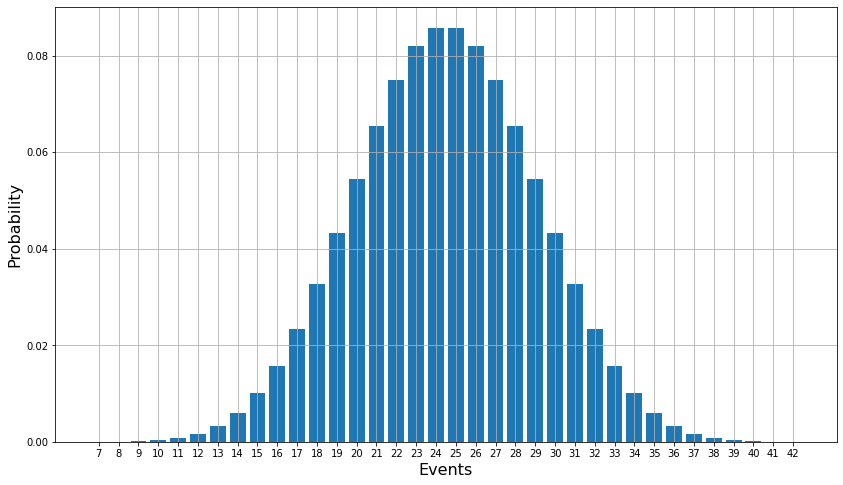

In [21]:
distribution(n=7);

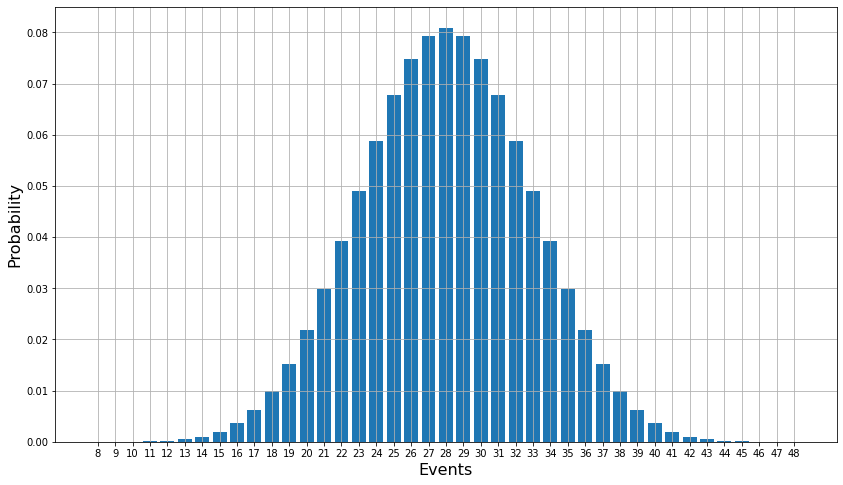

In [22]:
distribution(n=8);

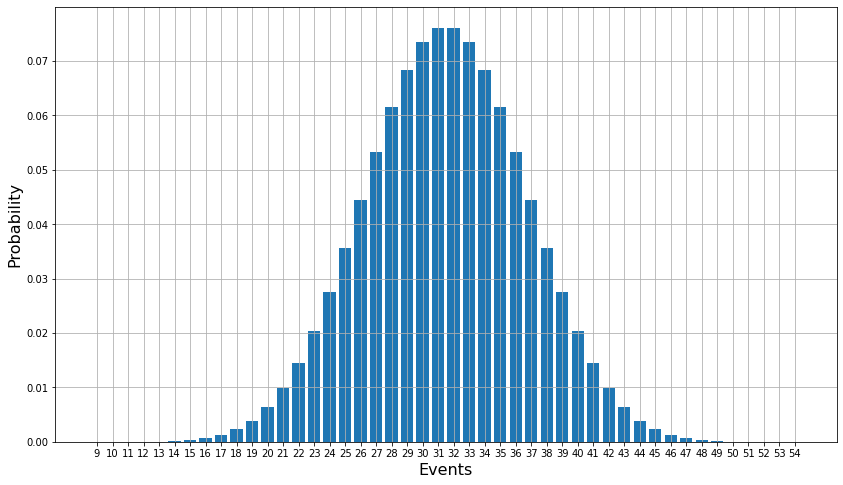

In [25]:
distribution(n=9);

In [8]:
len(microStates(3,states=['1','2','3','4','5','6']))

216

In [11]:
6**9

10077696

In [12]:
s = 0
e = 0
for r in microStates(2, states=['1','2','3','4','5','6']):
    if '4' in r:
        s += 1
        if '5' in r:
            e += 1
        print(r)

['1', '4']
['2', '4']
['3', '4']
['4', '1']
['4', '2']
['4', '3']
['4', '4']
['4', '5']
['4', '6']
['5', '4']
['6', '4']
